In [1]:
# 0. Run this code to import the libraries we will need.
import pandas as pd #data analysis and manipulation tool
import numpy as np #mathematical functions
import matplotlib.pyplot as plt #collection of functions creates a figure, creates a plotting area
import seaborn as sns #data visualization library based on matplotlib
import os # provides functions for interacting with the operating system
import geopy #locate the coordinates of addresses, cities, countries, and landmarks across the globe
import io

In [2]:
#Run this cell and upload the ice_cream_by_shop.csv file from your computer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ice_cream_by_shop.csv to ice_cream_by_shop.csv
User uploaded file "ice_cream_by_shop.csv" with length 384 bytes


In [3]:

"""
In this section, we will review:
- selecting columns
- filtering rows by characteristic
- creating a new variable
- creating a boxplot, line plot, and heat map in seaborn

And we will learn something new about:
- syntax for converting from wide to long format
- dropping columns
- combining multiple commands on a DataFrame
- what a pandas Index is
- how to set a DataFrame index

Be sure that you have downloaded ice_cream_by_shop.csv before starting.
"""

#Run this cell to load the file into a data frame and look at that data frame
ic_wide = pd.read_csv('./ice_cream_by_shop.csv') #upload data
print(ic_wide)

# Create a table of only the ID number, address, Wednesday, and Thursday ice cream
# sales from the data.
ic_subset = ic_wide[["ID","address","Wednesday","Thursday"]]
print(ic_subset)

     ID                       address  Monday  Tuesday  Wednesday  Thursday  \
0  3677              201 1st St 94022      42       55         92        45   
1  1492           6421 Brady St 77011     122      113        123       117   
2  5838                9 US-5 S 05045     148      155        143       177   
3  4297       12345 El Monte Rd 94022      88       85         91        90   
4  5336         2450 E Mason St 54302      99      102        105       102   
5  3442  4301 University Way NE 98105     155      159        142       145   

   Friday  Saturday  Sunday  
0      68       124     132  
1     115       122     122  
2     187       203     206  
3      93        40      38  
4      97       135     144  
5     146       180     182  
     ID                       address  Wednesday  Thursday
0  3677              201 1st St 94022         92        45
1  1492           6421 Brady St 77011        123       117
2  5838                9 US-5 S 05045        143       177


In [6]:
## Converting to long format and viewing distributions
## Pandas melt() function is used to change the DataFrame format from wide to long.
ic_long = ic_wide.melt(id_vars=['ID','address'],value_name='count',var_name='day')
print (ic_long)

      ID                       address        day  count
0   3677              201 1st St 94022     Monday     42
1   1492           6421 Brady St 77011     Monday    122
2   5838                9 US-5 S 05045     Monday    148
3   4297       12345 El Monte Rd 94022     Monday     88
4   5336         2450 E Mason St 54302     Monday     99
5   3442  4301 University Way NE 98105     Monday    155
6   3677              201 1st St 94022    Tuesday     55
7   1492           6421 Brady St 77011    Tuesday    113
8   5838                9 US-5 S 05045    Tuesday    155
9   4297       12345 El Monte Rd 94022    Tuesday     85
10  5336         2450 E Mason St 54302    Tuesday    102
11  3442  4301 University Way NE 98105    Tuesday    159
12  3677              201 1st St 94022  Wednesday     92
13  1492           6421 Brady St 77011  Wednesday    123
14  5838                9 US-5 S 05045  Wednesday    143
15  4297       12345 El Monte Rd 94022  Wednesday     91
16  5336         2450 E Mason S

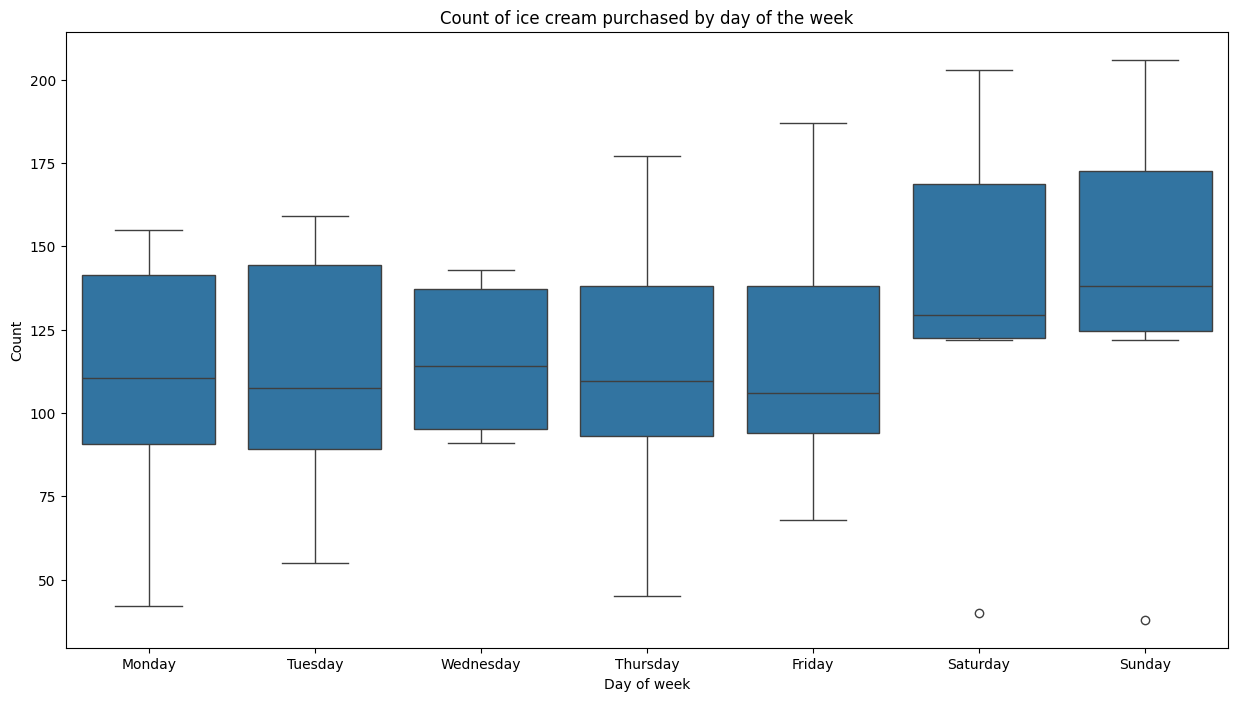

In [7]:
# Create a boxplot for the count of ice creams purchased by day of the week using
# the long data frame.
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=ic_long, x="day", y="count")
ax.set_xlabel("Day of week")
ax.set_ylabel("Count")
ax.set_title("Count of ice cream purchased by day of the week")

plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
      ID              address        day  count
1   1492  6421 Brady St 77011     Monday    122
7   1492  6421 Brady St 77011    Tuesday    113
13  1492  6421 Brady St 77011  Wednesday    123
19  1492  6421 Brady St 77011   Thursday    117
25  1492  6421 Brady St 77011     Friday    115
31  1492  6421 Brady St 77011   Saturday    122
37  1492  6421 Brady St 77011     Sunday    122
      ID                       address        day  count
5   3442  4301 University Way NE 98105     Monday    155
11  3442  4301 University Way NE 98105    Tuesday    159
17  3442  4301 University Way NE 98105  Wednesday    142
23  3442  4301 University Way NE 98105   Thursday    145
29  3442  4301 University Way NE 98105     Friday    146
35  3442  4301 University Way NE 98105   Saturday    180
41  3442  4301 University Way NE 98105     Sunday    182
      ID           address        day  count
0   3677  201 1st St 94022     Monday     42
6   3677  201 1

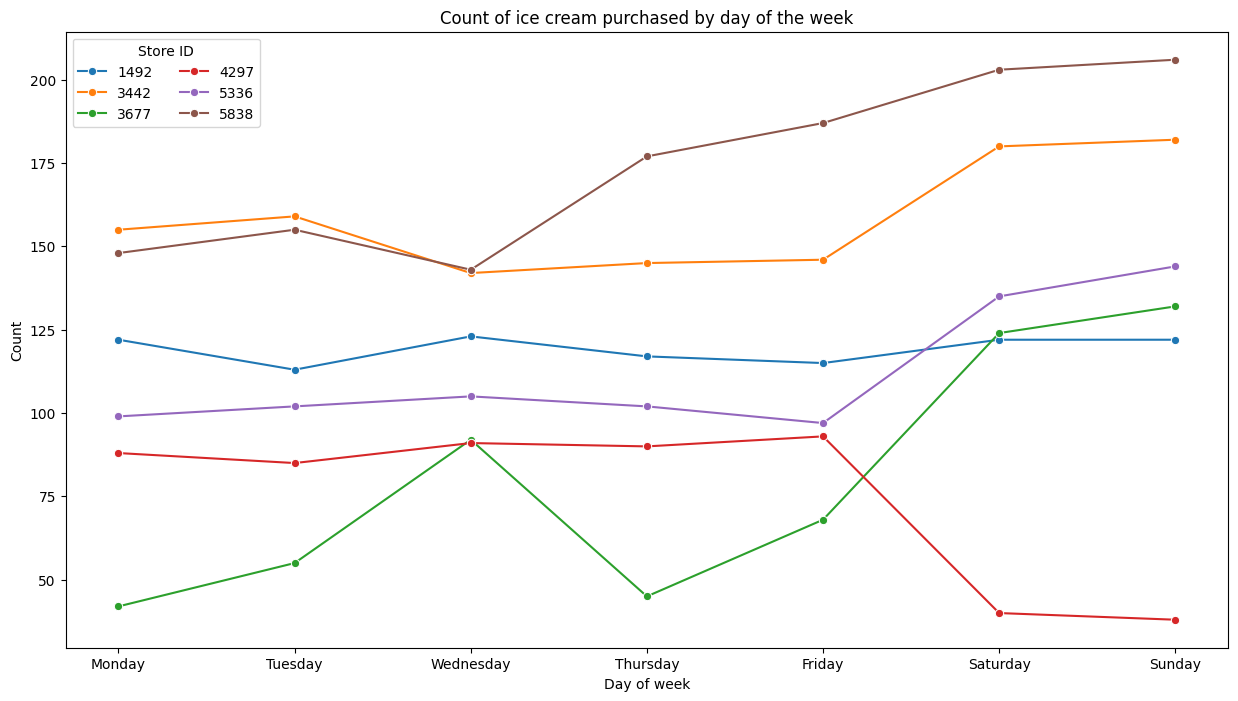

In [8]:
# Using the ic_long dataframe, create a time-series plot that shows the amount
# of ice cream sold each day of the week.

temp = ic_long.groupby('ID')
print(type(temp))
for key, item in temp:
  print(temp.get_group(key))

plt.figure(figsize = (15,8))
for label, grp in ic_long.groupby('ID'):
    ax = sns.lineplot(x='day', y='count', data=grp, marker='o', label=label)

ax.set_xlabel("Day of week")
ax.set_ylabel("Count")
ax.set_title("Count of ice cream purchased by day of the week")
plt.legend(title='Store ID', ncol=2, loc='best')
plt.show()

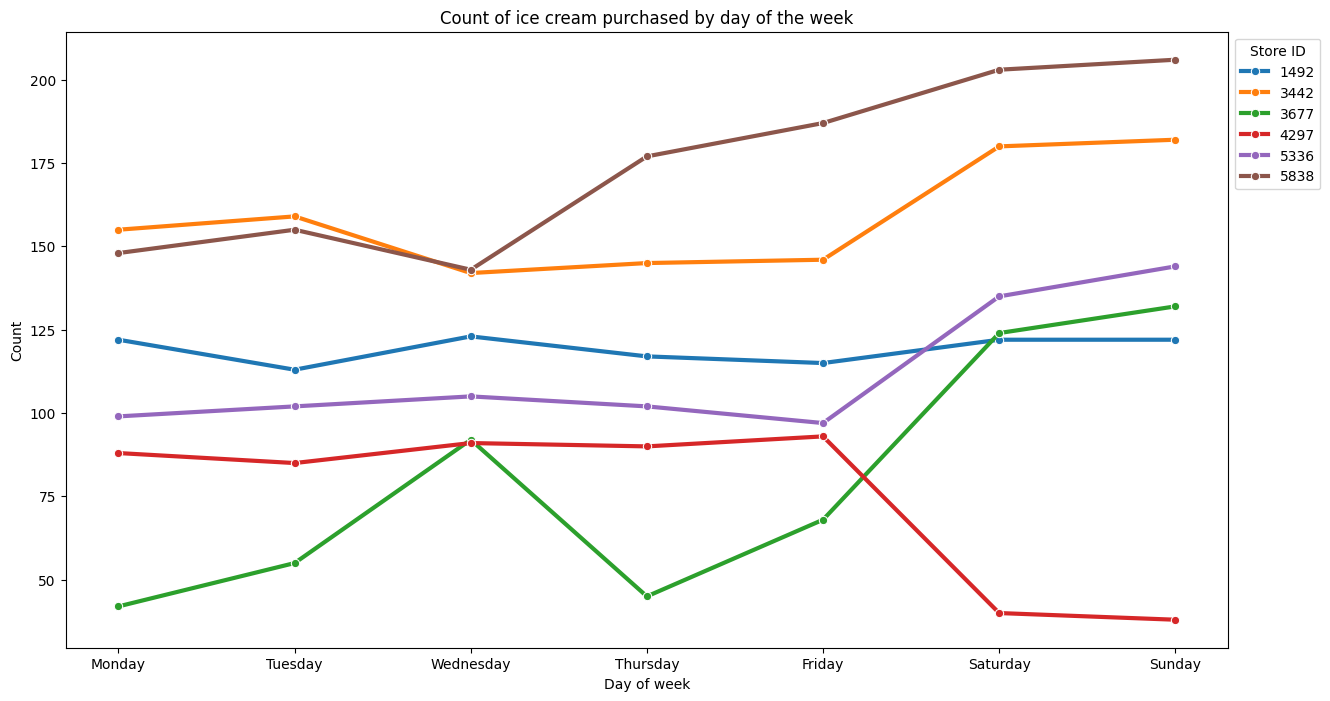

In [9]:
plt.figure(figsize = (15,8))
for label, grp in ic_long.groupby('ID'):
    ax = sns.lineplot(x='day', y='count', data=grp, marker='o', label=label, linewidth=3)

ax.set_xlabel("Day of week")
ax.set_ylabel("Count")
ax.set_title("Count of ice cream purchased by day of the week")
ax.legend(title='Store ID', bbox_to_anchor=(1,1)) #bbox_to_anchor() argument to place a seaborn legend outside of the plot.
plt.show()

                           address  Monday  Tuesday  Wednesday  Thursday  \
ID                                                                         
3677              201 1st St 94022      42       55         92        45   
1492           6421 Brady St 77011     122      113        123       117   
5838                9 US-5 S 05045     148      155        143       177   
4297       12345 El Monte Rd 94022      88       85         91        90   
5336         2450 E Mason St 54302      99      102        105       102   
3442  4301 University Way NE 98105     155      159        142       145   

      Friday  Saturday  Sunday  
ID                              
3677      68       124     132  
1492     115       122     122  
5838     187       203     206  
4297      93        40      38  
5336      97       135     144  
3442     146       180     182  
      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
ID                                                        

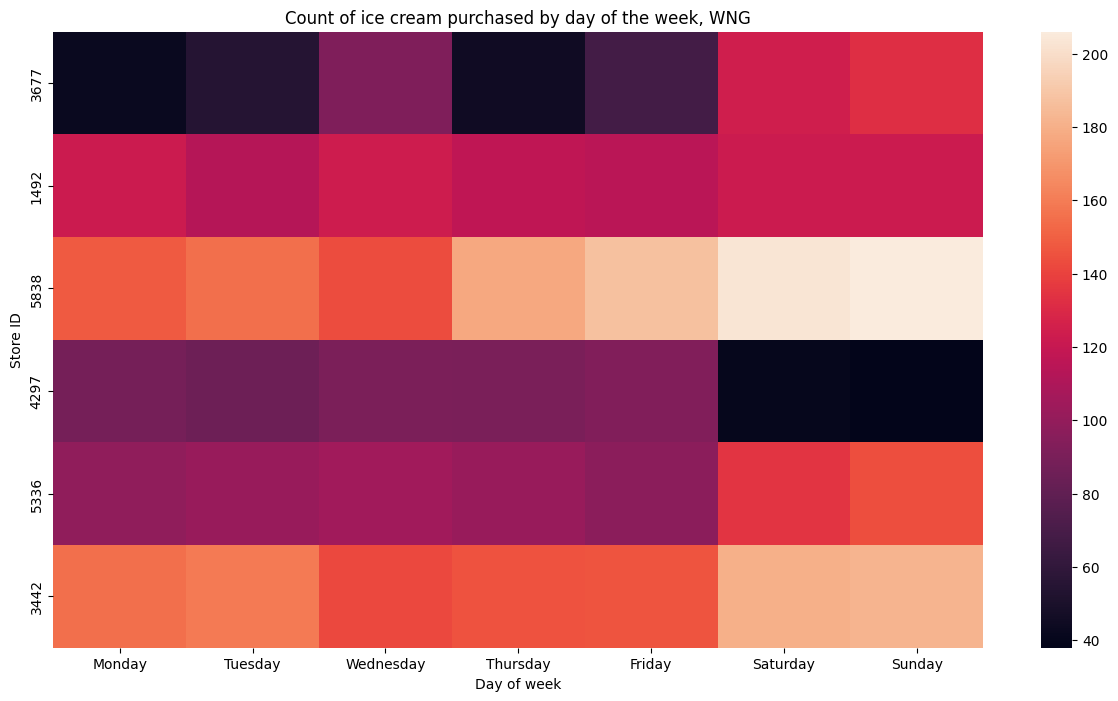

In [10]:

ic_wide.set_index('ID')
print(ic_wide.set_index('ID'))

ic_reformatted = ic_wide.drop(columns='address').set_index('ID')
print(ic_reformatted)

plt.figure(figsize = (15,8))

ax = sns.heatmap(data=ic_reformatted)
ax.set_xlabel("Day of week")
ax.set_ylabel("Store ID")
ax.set_title("Count of ice cream purchased by day of the week, WNG")
plt.show()

In [11]:
print(ic_wide)
#this is an example of list comprehension.
days_columns = [col for col in ic_wide.columns if col.endswith('day')]
print(days_columns)


     ID                       address  Monday  Tuesday  Wednesday  Thursday  \
0  3677              201 1st St 94022      42       55         92        45   
1  1492           6421 Brady St 77011     122      113        123       117   
2  5838                9 US-5 S 05045     148      155        143       177   
3  4297       12345 El Monte Rd 94022      88       85         91        90   
4  5336         2450 E Mason St 54302      99      102        105       102   
5  3442  4301 University Way NE 98105     155      159        142       145   

   Friday  Saturday  Sunday  
0      68       124     132  
1     115       122     122  
2     187       203     206  
3      93        40      38  
4      97       135     144  
5     146       180     182  
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [15]:
# explain: col for col in ic_wide.columns if col.endswith('day')
print(ic_wide.columns) # i.e Header
days_columns2 = []
for col in ic_wide.columns:
  if col.find('es') != -1:
    print(f'{col} - yes')
    days_columns2.append(col)
  else:
    print(f'{col} - no')

print(days_columns2)

Index(['ID', 'address', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday'],
      dtype='object')
ID - no
address - yes
Monday - no
Tuesday - yes
Wednesday - yes
Thursday - no
Friday - no
Saturday - no
Sunday - no
['address', 'Tuesday', 'Wednesday']


In [16]:

# Run this code to get the data frame subset that is only these days.
print(ic_wide[days_columns])

#The sum of all the ice creams for each shop
print(ic_wide[days_columns].sum())

print(ic_wide[days_columns].sum(axis=1)) #axis tells pandas whether to do operations by row i.e. each index 0-5



   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
0      42       55         92        45      68       124     132
1     122      113        123       117     115       122     122
2     148      155        143       177     187       203     206
3      88       85         91        90      93        40      38
4      99      102        105       102      97       135     144
5     155      159        142       145     146       180     182
Monday       654
Tuesday      669
Wednesday    696
Thursday     676
Friday       706
Saturday     804
Sunday       824
dtype: int64
0     558
1     834
2    1219
3     525
4     784
5    1109
dtype: int64


In [17]:
ic_wide["total_per_shop"] = ic_wide[days_columns].sum(axis=1)
print(ic_wide)

     ID                       address  Monday  Tuesday  Wednesday  Thursday  \
0  3677              201 1st St 94022      42       55         92        45   
1  1492           6421 Brady St 77011     122      113        123       117   
2  5838                9 US-5 S 05045     148      155        143       177   
3  4297       12345 El Monte Rd 94022      88       85         91        90   
4  5336         2450 E Mason St 54302      99      102        105       102   
5  3442  4301 University Way NE 98105     155      159        142       145   

   Friday  Saturday  Sunday  total_per_shop  
0      68       124     132             558  
1     115       122     122             834  
2     187       203     206            1219  
3      93        40      38             525  
4      97       135     144             784  
5     146       180     182            1109  


In [18]:
# Let's try out the geopy library!
# Run this code to look up the given address and see details.
geolocator = geopy.Nominatim(user_agent="example")
location = geolocator.geocode("201 1st St 94022")
location

Location(201, 1st Street, Los Altos, Santa Clara County, California, 94022, United States, (37.378111, -122.117829, 0.0))

In [19]:
# Run this to see even more details.
print(location.raw)

# We can extract the latitude like this.
print(location.latitude)

# We can extract the Longitude like this.
print(location.longitude)

{'place_id': 349015632, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 687205262, 'lat': '37.378111', 'lon': '-122.117829', 'class': 'place', 'type': 'house', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'place', 'name': '', 'display_name': '201, 1st Street, Los Altos, Santa Clara County, California, 94022, United States', 'boundingbox': ['37.3780610', '37.3781610', '-122.1178790', '-122.1177790']}
37.378111
-122.117829


In [20]:
location = geolocator.geocode("4301 University Way NE 98105")
location

print(location.raw)

{'place_id': 312851870, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 2464036648, 'lat': '47.6598971', 'lon': '-122.3133449', 'class': 'amenity', 'type': 'ice_cream', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'amenity', 'name': 'Sweet Alchemy Ice Creamery', 'display_name': 'Sweet Alchemy Ice Creamery, 4301, University Way Northeast, Greek Row, University District, Seattle, King County, Washington, 98105, United States', 'boundingbox': ['47.6598471', '47.6599471', '-122.3133949', '-122.3132949']}


In [21]:
#Run this to get the latitude for each address. It will store this information in
#the data frame. (ignore the SettingWithCopyWarning, if it appears)

def getLatitude(address, g):
    location = g.geocode(address, timeout=10000)
    return location.latitude

def getLongitude(address,geolocator):
    location = geolocator.geocode(address, timeout=10000)
    return location.longitude

ic_wide['latitudes'] = ic_wide['address'].apply(getLatitude,args=(geolocator,))
ic_wide['longitude'] = ic_wide['address'].apply(getLongitude,args=(geolocator,))
ic_wide

,ID,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,total_per_shop,latitudes,longitude
0,3677,201 1st St 94022,42,55,92,45,68,124,132,558,37.378111,-122.117829
1,1492,6421 Brady St 77011,122,113,123,117,115,122,122,834,29.741984,-95.310771
2,5838,9 US-5 S 05045,148,155,143,177,187,203,206,1219,42.670948,-72.555294
3,4297,12345 El Monte Rd 94022,88,85,91,90,93,40,38,525,37.361711,-122.128272
4,5336,2450 E Mason St 54302,99,102,105,102,97,135,144,784,44.486978,-87.960442
5,3442,4301 University Way NE 98105,155,159,142,145,146,180,182,1109,47.659897,-122.313345


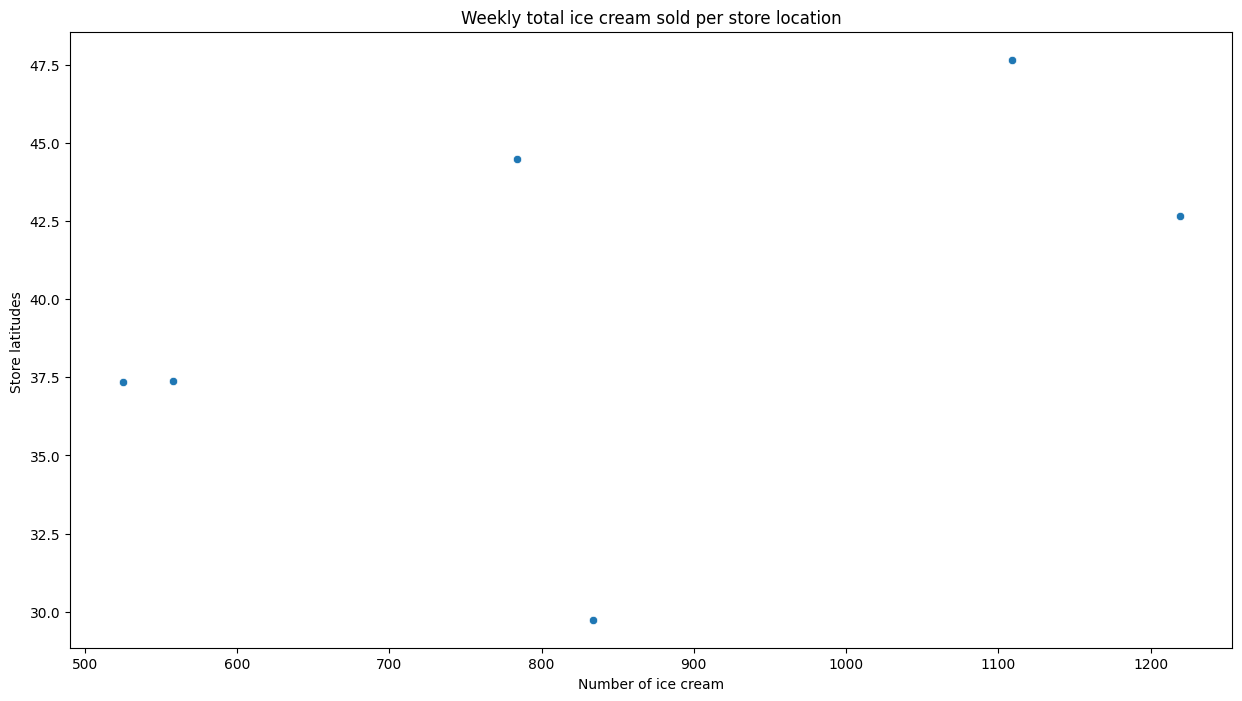

In [22]:
# Using Seaborn, create a scatterplot for the total_per_shop vs the latitude.
# Give this plot better axis labels and a title.
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data = ic_wide, x = "total_per_shop", y = "latitudes")
ax.set_ylabel("Store latitudes ")
ax.set_xlabel("Number of ice cream")
ax.set_title("Weekly total ice cream sold per store location")
plt.show()